# 第7章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．


## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル( https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing )（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

Google Newsデータセットをダウンロード


In [ ]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

--2021-06-12 23:42:19--  https://docs.google.com/uc?export=download&confirm=VxpW&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 172.217.2.110, 2607:f8b0:4004:80a::200e
Connecting to docs.google.com (docs.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-88-docs.googleusercontent.com/docs/securesc/ilerc7m4f0ocggbd8lk0sngov5a8ffm3/srf2ggctsl5j862csu58i3vu0srldfo6/1623541275000/06848720943842814915/12791668644525583096Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2021-06-12 23:42:20--  https://doc-0s-88-docs.googleusercontent.com/docs/securesc/ilerc7m4f0ocggbd8lk0sngov5a8ffm3/srf2ggctsl5j862csu58i3vu0srldfo6/1623541275000/06848720943842814915/12791668644525583096Z/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0s-88-docs.googleusercontent.com (doc-0s-88-docs.googleusercontent.com)... 172.217.15.65, 2607:f8b0:4004:810::2001
Connecting to doc-0s-88-docs.googleus

今回は、PythonのGensimというモデルを用いて、単語ベクトルを扱う。Gensimとは、トピック分析を行うことができるオープンソースライブラリ。Word2vecなどもGensimから利用可能。

In [ ]:
pip install --upgrade gensim

     |████████████████████████████████| 23.9MB 1.8MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)
#今回のデータセットは学習済みであるため、KeyedVectors.load_word2vec_format(ファイルパス)を用いて、データを読み込む。
#バイナリファイルを読み込む場合は，binary=Trueを指定

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
print(model['United_States'])
#KeyedVectorsというオブジェクトは，単語をキー，分散表現を値に持つ辞書のように扱うことができる

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ

In [ ]:
model.similarity('United_States', 'U.S.')
#2つの単語の類似度を得る場合は、similarityを用いる

0.73107743

## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
model.most_similar('United_States', topn=10)
#most_similarで、ある単語と類似している単語を上位topn件得る、返り値は(単語, 類似度)のリスト。

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
#positive=に正の項の単語を，negative=に負の項の単語を指定することで、単語ベクトルの足し引きができる。topn=で上位topn件を得る

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

https://gotutiyan.hatenablog.com/entry/2021/01/14/011030　を参考にした。

## 64. アナロジーデータでの実験

単語アナロジーの評価データ( http://download.tensorflow.org/data/questions-words.txt )をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

単語アナロジーの評価データをダウンロード

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2021-06-12 23:46:39--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.164.144, 2607:f8b0:4004:814::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.164.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2021-06-12 23:46:39 (206 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [ ]:
!head -15 ./questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba
Athens Greece Helsinki Finland
Athens Greece Islamabad Pakistan
Athens Greece Kabul Afghanistan
Athens Greece London England
Athens Greece Madrid Spain


In [ ]:
data = open('./questions-words.txt', 'r')
answer64 = []
for line in data: # dataから1行ずつ読込
    line = line.split()
    if line[0] == ':':#カテゴリ名の先頭は、「：」
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      #vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と，その類似度をword,cosにそれぞれ代入
      answer64.append(' '.join([category] + line + [word, str(cos) + '\n']))#単語と類似度は，各事例の末尾に追記


In [ ]:
for i in range(15):
  print(answer64[i])

print(len(answer64))

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.635187029838562

capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878

capital-common-countries Athens Greece Beijing China China 0.7235778570175171

capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687

capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414

capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527808547019958

capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824

capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036

capital-common-countries Athens Greece Havana Cuba Cuba 0.6460990905761719

capital-common-countries Athens Greece Helsinki Finland Finland 0.68999844789505

capital-common-countries Athens Greece Islamabad Pakistan Pakistan 0.7233326435089111

capital-common-countries Athens Greece Kabul Afghanistan Afghan 0.6160916090011597

capital-common

3時間くらいかかった

## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:

sem_total = 0
sem_correct = 0
syn_total = 0
syn_correct = 0
for line in answer64:
  line = line.split()
  if line[0] == 'capital-common-countries' or line[0] == 'capital-world' or line[0] == 'currency' or line[0] == 'city-in-state' or line[0] == '	family':
    #カテゴリ名がこの5つのものは意味的アナロジー、それ以外は文法アナロジー
    sem_total += 1
    if line[4] == line[5]:#正解
      sem_correct += 1
  else:
    syn_total += 1
    if line[4] == line[5]:
      syn_correct += 1

#正解率の計算
sem_accuracy = sem_correct / sem_total
syn_accuracy = syn_correct / syn_total

print('意味的アナロジー正解率: ', sem_accuracy)
print('文法的アナロジー正解率: ', syn_accuracy) 



意味的アナロジー正解率:  0.7239029056558651
文法的アナロジー正解率:  0.7448349879259458


## 66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collection（ http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html ）の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2021-06-13 02:39:58--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.009s  

2021-06-13 02:39:58 (2.57 MB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


このデータでは、単語のペアに対して人間が評価した類似度が付与されている。10がMax。

In [ ]:
!head -10 ./combined.csv

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
!head -10 ./set1.csv

Word 1,Word 2,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13
love,sex,6.77,9,6,8,8,7,8,8,4,7,2,6,7,8
tiger,cat,7.35,9,7,8,7,8,9,8.5,5,6,9,7,5,7
tiger,tiger,10.00,10,10,10,10,10,10,10,10,10,10,10,10,10
book,paper,7.46,8,8,7,7,8,9,7,6,7,8,9,4,9
computer,keyboard,7.62,8,7,9,9,8,8,7,7,6,8,10,3,9
computer,internet,7.58,8,6,9,8,8,8,7.5,7,7,7,9,5,9
plane,car,5.77,6,6,7,5,3,6,7,6,6,6,7,3,7
train,car,6.31,7,7.5,7.5,5,3,6,7,6,6,6,9,4,8
telephone,communication,7.50,7,6.5,8,8,6,8,8,7,5,9,9,8,8


In [ ]:
!head -10 ./set2.csv

Word 1,Word 2,Human (mean),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
energy,secretary,1.81,1,0,4,2,4,5,1,1,1,0,1,1,4,0,2,2
secretary,senate,5.06,7,1,7,4,4,7,1,3,4,8,4,5,6,7,6,7
energy,laboratory,5.09,7,1,7.5,4,6,7,4,6,1,2,4,3,7,9,6,7
computer,laboratory,6.78,8,5,8,7,6,9,6,7,6,7.5,4,5,8,9,7,6
weapon,secret,6.06,7,4,8,6,6,9,2,6,3,6,5,6,8,9,7,5
FBI,fingerprint,6.94,8,6,8,5,5,9,7,7,6,6,6,8,9,7,6,8
FBI,investigation,8.31,9,9,8.5,9,7,9,8,8,8,7.5,6,9,10,9,7,9
investigation,effort,4.59,5,1,7.5,2,4,7,6,5,2,2,2,7,6,5,6,6
Mars,water,2.94,2,1,3,2,1,8,0,4,2,6,1,1,3,0,5,8


In [ ]:
!head -10 ./combined.tab

Word 1	Word 2	Human (mean)
love	sex	6.77
tiger	cat	7.35
tiger	tiger	10.00
book	paper	7.46
computer	keyboard	7.62
computer	internet	7.58
plane	car	5.77
train	car	6.31
telephone	communication	7.50


In [ ]:
!head -10 ./set1.tab

Word 1	Word 2	Human (mean)	1	2	3	4	5	6	7	8	9	10	11	12	13	
love	sex	6.77	9	6	8	8	7	8	8	4	7	2	6	7	8	
tiger	cat	7.35	9	7	8	7	8	9	8.5	5	6	9	7	5	7	
tiger	tiger	10.00	10	10	10	10	10	10	10	10	10	10	10	10	10	
book	paper	7.46	8	8	7	7	8	9	7	6	7	8	9	4	9	
computer	keyboard	7.62	8	7	9	9	8	8	7	7	6	8	10	3	9	
computer	internet	7.58	8	6	9	8	8	8	7.5	7	7	7	9	5	9	
plane	car	5.77	6	6	7	5	3	6	7	6	6	6	7	3	7	
train	car	6.31	7	7.5	7.5	5	3	6	7	6	6	6	9	4	8	
telephone	communication	7.50	7	6.5	8	8	6	8	8	7	5	9	9	8	8	


In [ ]:
!head -10 ./set2.tab

Word 1	Word 2	Human (mean)	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16
energy	secretary	1.81	1	0	4	2	4	5	1	1	1	0	1	1	4	0	2	2
secretary	senate	5.06	7	1	7	4	4	7	1	3	4	8	4	5	6	7	6	7
energy	laboratory	5.09	7	1	7.5	4	6	7	4	6	1	2	4	3	7	9	6	7
computer	laboratory	6.78	8	5	8	7	6	9	6	7	6	7.5	4	5	8	9	7	6
weapon	secret	6.06	7	4	8	6	6	9	2	6	3	6	5	6	8	9	7	5
FBI	fingerprint	6.94	8	6	8	5	5	9	7	7	6	6	6	8	9	7	6	8
FBI	investigation	8.31	9	9	8.5	9	7	9	8	8	8	7.5	6	9	10	9	7	9
investigation	effort	4.59	5	1	7.5	2	4	7	6	5	2	2	2	7	6	5	6	6
Mars	water	2.94	2	1	3	2	1	8	0	4	2	6	1	1	3	0	5	8


In [ ]:
!cat ./instructions.txt

Estimation of word similarity
-----------------------------


Hello,

We kindly ask you to assist us in a psycholinguistic experiment, 
aimed at estimating the similarity of various words in the English 
language. The purpose of this experiment is to assign similarity scores 
to pairs of words, so that machine learning algorithms can be 
subsequently trained and adjusted using human-assigned scores.

Below is a list of pairs of words. For each pair, please assign 
a numerical similarity score between 0 and 10 (0 = words are totally 
unrelated, 10 = words are VERY closely related). By definition, 
the similarity of the word to itself should be 10. You may assign 
fractional scores (for example, 7.5).

Specific instructions:

1) The questionnaire starts on the next page.
2) Please fill in your full name at the beginning of the questionnaire. 
   We need the names to ensure individual estimations do not get mixed, 
   and to be able to contact you should any clarifications become necessar

相関係数は、0から1の範囲にあるときは一方の変数が大きくなるに従い他方も大きくなるという正の相関が，－1から0の範囲にあるときは一方の変数が大きくなるに従い他方は小さくなるという負の相関があることを意味する。スピアマンの相関は、2つの連続変数または順位変数間の単調関係を評価する。スピアマンの相関は、順位変数を含む関係を評価するためによく使用される。
他の相関を求める方法として、ピアソンの積率相関がある。ピアソンの相関は、2つの連続変数間の線形関係を評価する。

前問64と同様に、単語ベクトルにより計算される類似度を行列の形で追加する


In [ ]:
data = open('./combined.csv', 'r')
answer66 = []
i = 0
for line in data:
  if i != 0:
    line = [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0], line[1]))
    answer66.append(line)
  i += 1


In [ ]:
for i in range(15):
  print(answer66[i])

print(len(answer66))

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]
['computer', 'internet', '7.58', 0.40686232]
['plane', 'car', '5.77', 0.3779698]
['train', 'car', '6.31', 0.3402561]
['telephone', 'communication', '7.50', 0.33218452]
['television', 'radio', '6.77', 0.6114971]
['media', 'radio', '7.42', 0.3899161]
['drug', 'abuse', '6.85', 0.24085768]
['bread', 'butter', '6.19', 0.6417261]
['cucumber', 'potato', '5.92', 0.5678562]
['doctor', 'nurse', '7.00', 0.63195235]
353


スピアマンの相関をspearmanrをインポートして求める。

In [ ]:
import numpy as np
from scipy.stats import spearmanr

# スピアマン相関係数の計算
human = np.array(answer66).T[2]#転置を利用して、人間の評価値の行列を得る
w2v = np.array(answer66).T[3]#同様に、Word2vecの評価値の行列を得る。
correlation, pvalue = spearmanr(human, w2v)#スピアマン相関の計算

print('スピアマン相関係数: ', correlation)

スピアマン相関係数:  0.6849564489532377


In [ ]:
#spearmanrの基本形
from scipy.stats import spearmanr

math    = [6, 4, 5, 10, 2, 8, 3, 9, 1, 7]
english = [10, 1, 4, 9, 3, 8, 6, 5, 2, 7]

correlation, pvalue = spearmanr(math, english)

print(correlation) #0.6727272727272726

## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

前問64の単語ベクトルの評価データから、国名に関する単語を抽出し、その単語ベクトルを得る。


In [ ]:
#国名を抽出
country_list = []
for line in answer64:
  line = line.split()
  if line[0] == 'capital-common-countries' or line[0] == 'capital-world':
    country_list.append(line[2])
  elif line[0] == 'currency' or line[0] == 'gram6-nationality-adjective':
    country_list.append(line[1])

country_list = list(set(country_list))#重複除去
    
country_vec = [model[country] for country in country_list]#単語ベクトルを得る

In [ ]:
for i in range(15):
  print(country_list[i])

print('number:',len(country_list))

Spain
Laos
Zambia
Malaysia
Taiwan
Gambia
Cambodia
Lithuania
England
Venezuela
Lebanon
Cuba
Turkmenistan
Uruguay
Indonesia
number: 129


In [ ]:
for i in range(1):
  print(country_vec[i])

print('number:',len(country_vec))

[ 3.14941406e-02 -1.82617188e-01  1.63085938e-01  1.24511719e-01
 -1.85546875e-02 -1.73828125e-01 -1.21093750e-01 -1.32812500e-01
 -1.25000000e-01  2.45117188e-01 -2.18750000e-01  4.29687500e-02
  1.66015625e-01 -1.14746094e-01 -7.37304688e-02  2.81982422e-02
  7.71484375e-02  1.39648438e-01  1.06445312e-01  3.98437500e-01
  3.18359375e-01 -3.34472656e-02  3.80859375e-02  2.15820312e-01
 -3.93676758e-03  4.95605469e-02 -1.81640625e-01 -1.77734375e-01
 -2.17773438e-01  2.28515625e-01  1.47460938e-01  2.80761719e-02
  4.08935547e-03 -9.32617188e-02 -1.15722656e-01 -1.01318359e-02
 -3.69140625e-01 -1.53320312e-01  6.07910156e-02  1.50146484e-02
  1.42578125e-01  4.63867188e-03  7.12890625e-02  2.69531250e-01
  1.96289062e-01  6.73828125e-02  1.64794922e-03 -7.61718750e-02
 -8.15429688e-02  2.51953125e-01 -1.38671875e-01  2.61718750e-01
  1.13525391e-02 -3.22265625e-02 -1.71875000e-01  1.67968750e-01
 -3.35937500e-01  8.10546875e-02 -1.99218750e-01  1.17187500e-01
 -2.94189453e-02  6.83593

k-meansクラスタリングをクラスタ数k=5として実行

以下、https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means　より引用

クラスタ分析 (クラスタリング, Clustering) とは、ラベル付けがなされていないデータに対して、近しい属性を持つデータをグループ化する手法です。

クラスタ分析には大別して、K-Means に代表される「非階層的クラスタ分析」と Ward 法 (ウォード法) に代表される「階層的クラスタリング」の2種類が存在します。

・非階層的クラスタリング (例: K-Means 法) では、決められたクラスタ数にしたがって、近い属性のデータをグループ化します。

・階層的クラスタリング (例: Ward 法) では、クラスタリングの結果を木構造で出力する特徴があります。縦方向の長さ (深さ) は類似度を示し、長いほど類似度が低く、短いほど類似度が高いことを示します。


・K-Means 法 (K-平均法ともいいます) は、基本的には、以下の 3 つの手順でクラスタリングを行います。

1．初期値となる重心点をサンプルデータ (データセット全体からランダムに集めた少量のデータ) から決定。

2．各サンプルから最も近い距離にある重心点を計算によって求め、クラスタを構成。

3．2.で求めたクラスタごとに重心を求め、2. を再度実行する。2. ～ 3. を決められた回数繰り返し実行し、大きな変化がなくなるまで計算。


scikit-learn には、K-means 法によるクラスタ分析を行うクラスとして、sklearn.cluster.KMeans クラスが用意されている。

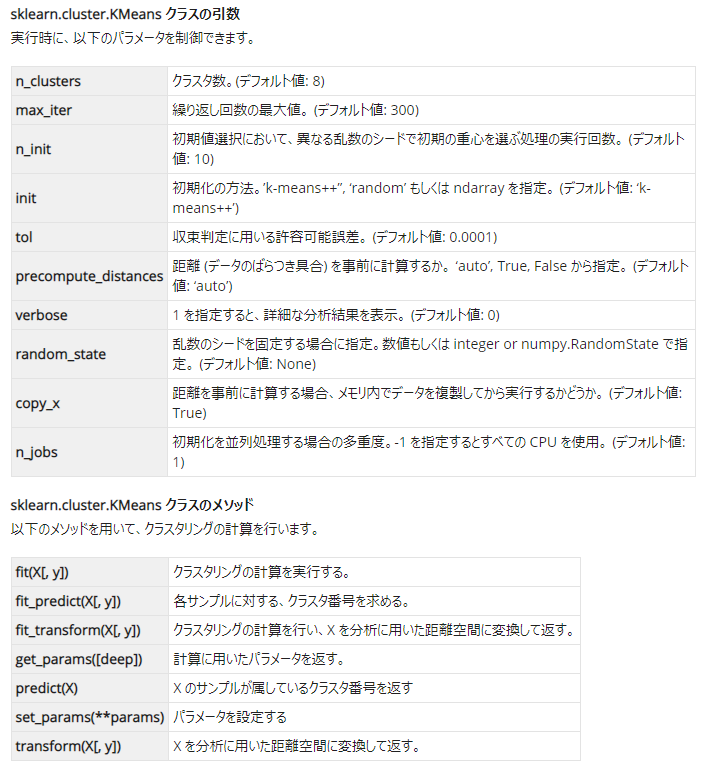

In [ ]:
from sklearn.cluster import KMeans

#k-meansクラスタリング
kmeans = KMeans(n_clusters=5)#n_clusters引数により、クラスター数を5に指定
kmeans.fit(country_vec)#クラスタリングの計算を実行
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([country_list[k] for k in cluster]))

cluster 0
Belize, Jamaica, Suriname, Bahamas, Samoa, Fiji, Guyana, Dominica, Tuvalu
cluster 1
Zambia, Gambia, Somalia, Burundi, Sudan, Guinea, Rwanda, Kenya, Nigeria, Malawi, Mauritania, Gabon, Liberia, Mozambique, Tunisia, Algeria, Niger, Namibia, Eritrea, Zimbabwe, Botswana, Uganda, Madagascar, Ghana, Senegal, Angola, Mali
cluster 2
Laos, Malaysia, Taiwan, Cambodia, Venezuela, Lebanon, Cuba, Turkmenistan, Indonesia, Kyrgyzstan, Libya, Jordan, Qatar, Colombia, Thailand, Nicaragua, Bahrain, Ecuador, Iraq, Pakistan, Mexico, Japan, Korea, Israel, Uzbekistan, Afghanistan, Chile, Iran, Peru, Egypt, India, Vietnam, Oman, Bangladesh, Honduras, Nepal, Syria, Morocco, Philippines, Bhutan, China, Tajikistan
cluster 3
Spain, England, Uruguay, Argentina, Ireland, Belgium, Germany, Norway, Denmark, USA, Greenland, Italy, Liechtenstein, Brazil, Netherlands, Switzerland, France, Austria, Iceland, Portugal, Malta, Finland, Europe, Australia, Canada, Sweden
cluster 4
Lithuania, Serbia, Slovenia, Greec

## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

Ward法とは
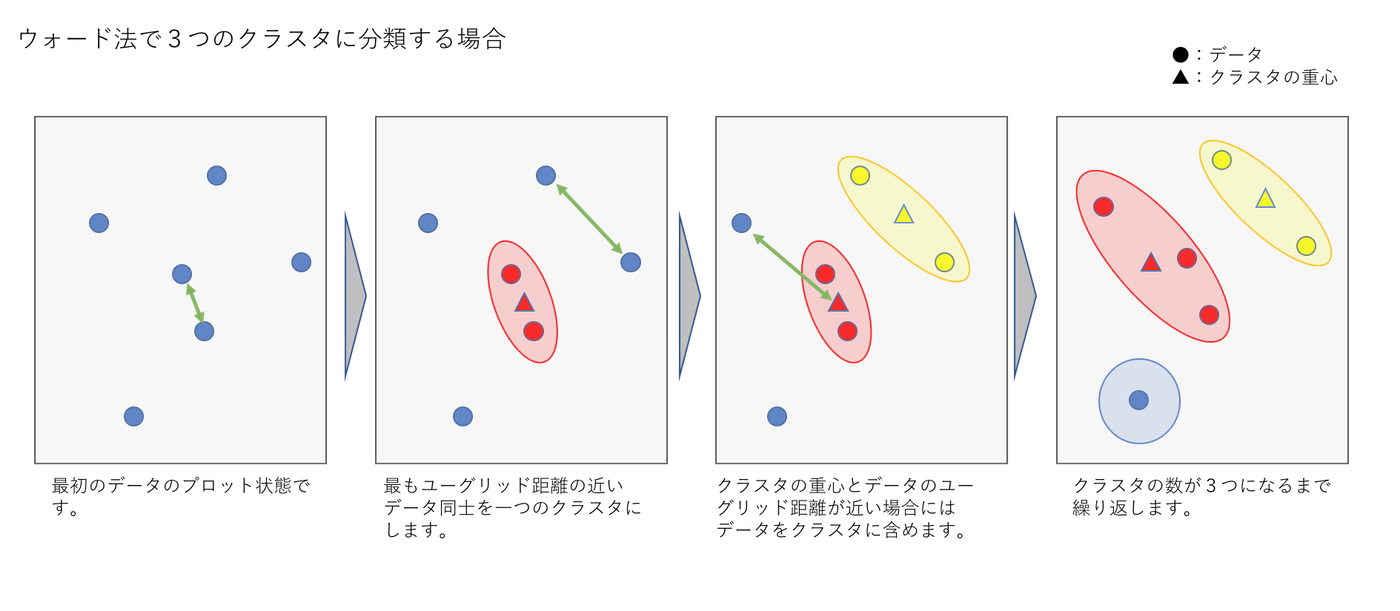

デンドログラムとは、クラスター分析において各個体がクラスターにまとめられていく様子を樹形図の形で表したもの。

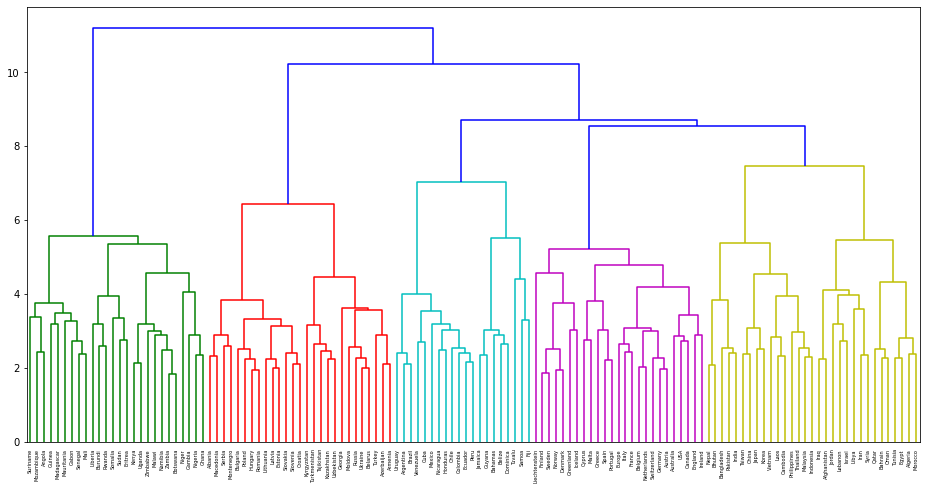

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


plt.figure(figsize=(16, 8))
Z = linkage(country_vec, method='ward')#linkageモジュールを使ってクラスタリングを行い、ndarrayを返す
#引数methodにwardを指定して、ウォード法を行う
dendrogram(Z, labels=country_list)#linkageの結果の行列を用いて、デンドログラムを作成。
#labelsにより、ラベルを指定する。デフォルトでは、インデックス番号。
plt.show()

## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

t-SNEは高次元データを2次元や3次元に落とし込むための次元削減アルゴリズムであり、特に高次元データを可視化する際に有用。

・処理のポイント

高次元での距離分布が低次元での距離分布にもできるだけ合致するように変換する
距離の分布をスチューデンのt-分布に従うと仮定(SNEではガウス分布を仮定していたが、そこから改良された)

・メリット

高次元の局所的な構造を非常によく捉える

大局的な構造も可能な限り捉える

・デメリット

Perplexity(内部のパラメータ)を変えると全くことなるクラスターが出現してしまう

https://qiita.com/g-k/items/120f1cf85ff2ceae4aba

In [ ]:
!pip install bhtsne
#scikit-learnのt-SNEは遅いらしい

     |████████████████████████████████| 92kB 7.0MB/s 
  Created wheel for bhtsne: filename=bhtsne-0.1.9-cp37-cp37m-linux_x86_64.whl size=214521 sha256=5a907a915449a5a5b81b8b57f8b940bc6b8e5a7adf3c3e95de2a1f811baf120e
  Stored in directory: /root/.cache/pip/wheels/d3/11/da/b469506296148e4a04bb3bd5083052a2c5d44709851ed17c21
Successfully built bhtsne


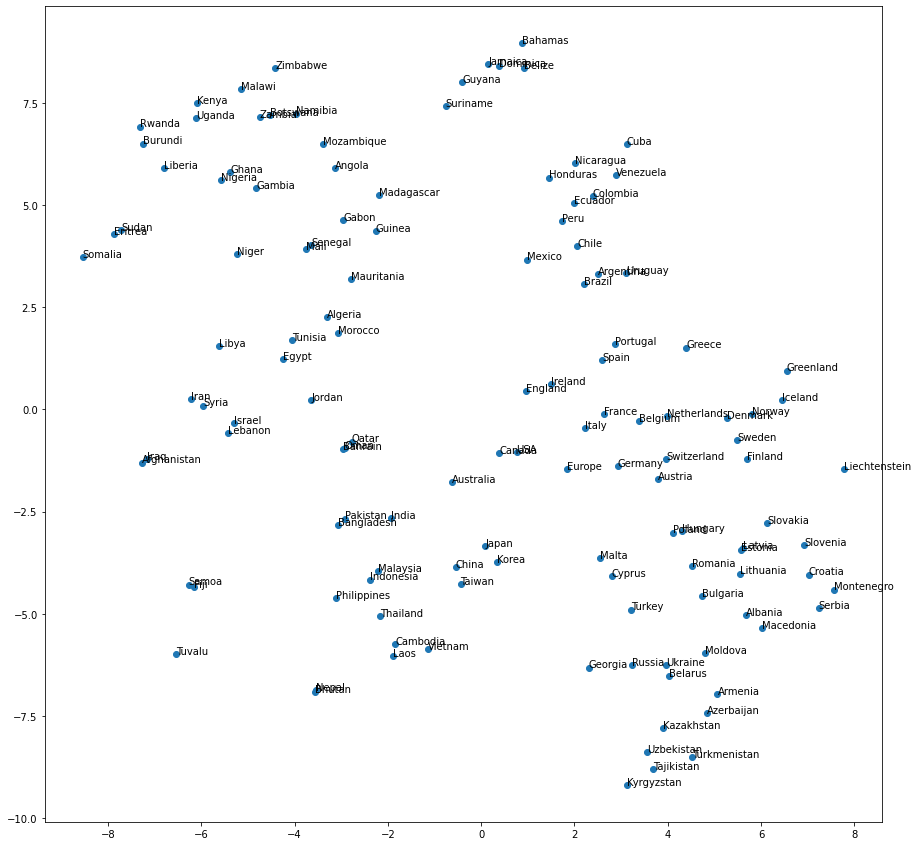

In [ ]:
import bhtsne

embedded = bhtsne.tsne(np.array(country_vec).astype(np.float64), dimensions=2, rand_seed=123)
#国名に関する単語ベクトルを与えて、t-SNEを行う
#dimension=2で、2次元に次元削減
#astype(np.float64)で、データを倍精度浮動小数点型に変換
plt.figure(figsize=(15, 15))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
#2次元になった単語ベクトルを散布図で表示
for (x, y), name in zip(embedded, country_list):
    plt.annotate(name, (x, y))
plt.show()